# Measuring Risk in Option Portfolios - Greeks

**Greeks** are used to measure how option price changes with respect to a unit change in a pricing input.

## Building a mini-quant Library

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

In [2]:
S_space = np.linspace(70, 130, 100)

Black scholes Formula:

$$C(S,T) = \text{N}(d_1)Se^{-qT} - \text{N}(d_2)Ke^{-rT}$$

$$P(S,T) = \text{N}(-d_2)Ke^{-rT} - \text{N}(-d_1)Se^{-qT}$$

Where
- $\text{N}(\cdot)$ is the cdf of a standard normal distribution
- The pdf of a standard normal distribution is $\text{N}'(x)=\dfrac{1}{\sqrt{2\pi}}e^{-\dfrac{x^2}{2}}$
- $d_1 = \dfrac{ln(S/K) + (r-q+\sigma^2/2)/T}{\sigma\sqrt{T}}$
- $d_2 = d_1 - \sigma\sqrt{T}$

In [3]:
def d1(S, T, K, r, vol):
    return (np.log(S/K) + (r+vol**2/2)*T)/vol/np.sqrt(T)

def d2(S, T, K, r, vol):
    return d1(S, T, K, r, vol) - vol*np.sqrt(T)

In [4]:
def call_price(S, T, K, r, vol):
    if T==0:
        return max(S-K, 0)
    else:
        return S*st.norm.cdf(d1(S, T, K, r, vol)) - K*np.exp(-r*T)*st.norm.cdf(d2(S, T, K, r, vol))
    
def put_price(S, T, K, r, vol):
    if T==0:
        return max(K-S, 0)
    else:
        return K*np.exp(-r*T)*st.norm.cdf(-d2(S, T, K, r, vol)) - S*st.norm.cdf(-d1(S, T, K, r, vol))

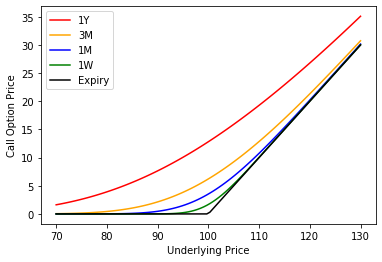

In [5]:
plt.plot(S_space, [call_price(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [call_price(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [call_price(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [call_price(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.plot(S_space, [call_price(S, T=0, K=100, r=0.02, vol=0.3) for S in S_space], color='black', label='Expiry')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Call Option Price')

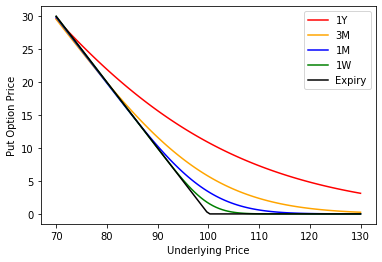

In [6]:
plt.plot(S_space, [put_price(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [put_price(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [put_price(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [put_price(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.plot(S_space, [put_price(S, T=0, K=100, r=0.02, vol=0.3) for S in S_space], color='black', label='Expiry')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Put Option Price')

## Taylor Polynomial

Given a k-th order differentiable function $f$, its **k-th order Taylor Polynomial** is
$$P_k(x) = f(a) + f'(a)(x-a) + \dfrac{f''(a)}{2!}(x-a)^2 + \cdots + \dfrac{f^{(k)}(a)}{k!}(x-a)^k$$

## Delta

**Delta** measures how the option price changes for a unit change in the underlying.

Mathematically it is the first order derivative of the Option Price with respect to its underlying.

$$\Delta = \dfrac{\partial V}{\partial S}$$

$$\text{Delta Pnl} = \Delta \times dS$$

$$\Delta_C = \text{N}(d_1), $$

$$\Delta_P = -\text{N}(-d_1) = \text{N}(d_1) - 1 $$

In [7]:
def call_delta(S, T, K, r, vol):
    return st.norm.cdf(d1(S, T, K, r, vol))

def put_delta(S, T, K, r, vol):
    return -st.norm.cdf(-d1(S, T, K, r, vol))

Note how ATM call options all have delta of around 50%

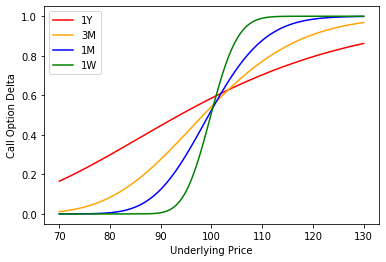

In [8]:
plt.plot(S_space, [call_delta(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [call_delta(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [call_delta(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [call_delta(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Call Option Delta')

Note how ATM put options all have delta of around -50%.

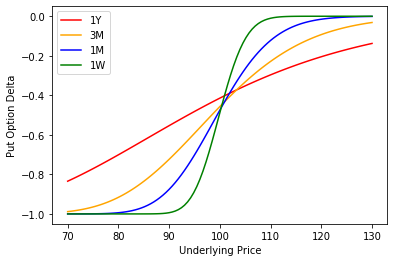

In [9]:
plt.plot(S_space, [put_delta(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [put_delta(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [put_delta(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [put_delta(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Put Option Delta')

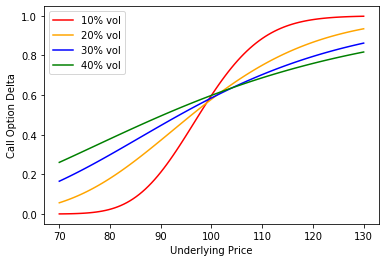

In [10]:
plt.plot(S_space, [call_delta(S, T=1, K=100, r=0.02, vol=0.1) for S in S_space], color='red', label='10% vol')
plt.plot(S_space, [call_delta(S, T=1, K=100, r=0.02, vol=0.2) for S in S_space], color='orange', label='20% vol')
plt.plot(S_space, [call_delta(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='30% vol')
plt.plot(S_space, [call_delta(S, T=1, K=100, r=0.02, vol=0.4) for S in S_space], color='green', label='40% vol')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Call Option Delta')

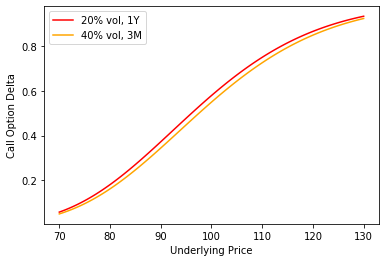

In [11]:
plt.plot(S_space, [call_delta(S, T=1, K=100, r=0.02, vol=0.2) for S in S_space], color='red', label='20% vol, 1Y')
plt.plot(S_space, [call_delta(S, T=1/4, K=100, r=0.02, vol=0.4) for S in S_space], color='orange', label='40% vol, 3M')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Call Option Delta')

**Properties of Delta**

- Option Price Sensitivity
    - Delta is the change in price of an option for a 1 unit move in the underlying. A delta of 0.5 means that a one cent increase in the underlying price will cause a one-half of a cent increase in the option price. Hench, the option price moves only half as much as the underlying price.
    
- Hedge Ratio
    - Since delta is a measure of how sensitive an optino's price is to changes in the underlying, it's useful as a hedge ratio. A long position in 10 ATM call options behaves like a long position in 5 futures.
    
    - Constructing a delta hedge for a **long** position in 10 ATM calls, each with a delta of 0.5, would require you to **sell** 5 futures contracts (futures are 'delta one' instruments).
    
- Moneyness
    - Delta can be interpreted as the probability that an option will end up ITM. An ATM option, which has a delta of approximately 0.5, has roughly a 50/50 chance of ending up ITM. OTM options have deltas less than 0.5; ITM options have deltas greater than 0.5.
    - Call option deltas range between 0 and 1. Put option deltas range between 0 and -1.
    - The delta of a long option position increases as the underlying option price increases. (True for both put and call). This reflects one of the main benefits of being long options compaired to holding a position in the underlying. A long option position becomes longer the market when market is rallying and shorter the market when the market sells off.

- Time to Expiration
    - Deltas of ITM call options increase towards 1 as time passes.
    - Deltas of OTM call options decrease towards 0 as time passes.
    - Deltas become more changeable for ATM options as time passes.
    - (Think about a soccer game.)
    
- Volatility
    - An increase in volatility raises the delta of OTM call options, and lowers the delta of ITM options. At higher volatility levels, OTM options have a greater chance of ending up ITM; ITM options have a greater chance of ending up OTM.
    - A doubling of volatility has roughly the same effect on an options delta as a quadrupling of time. For example, the 100 strike call option delta is 0.92 with 1 month to expiration, futures = 102, and volatility = 5\%. If volatility increases to 10\%, the delta falls to 0.76, which is about the same delta that a 4 month option would have with volatility at 5\%.

- Symmetry
    - There is an enormous amount of symmetry at work in option pricing models. For example, a 100 strike call has a delta of 0.76 when it's 2 points in the money (futures=102), there  is 1 month to expiration and vol=10\%. This tells us that there is roughly a 76\% chance the option will end up ITM and a 24\% chance the option will end up OTM at expiration. With the option 2 points OTM (futures=98) on the other hand, the delta is 0.25, suggesting the option has a 25\% chance of ending up ITM and 75\% chance of ending up OTM.

## Gamma

**Gamma** measures how delta changes for a unit change in the underlying.

It is the second order derivative of the option price with respect to its underlying.

$$\Gamma = \dfrac{\partial^2 V}{\partial S^2}$$

$$\text{Gamma PnL} = \dfrac{1}{2}\Gamma\times (dS)^2 \approx \dfrac{1}{2}\Gamma S^2\sigma^2dt$$ 

$$\Gamma = e^{-q\tau}\dfrac{\text{N}'(d_1)}{S\sigma\sqrt{\tau}} $$

In [12]:
def gamma(S, T, K, r, vol):
    return st.norm.pdf(d1(S, T, K, r, vol))/S/vol/np.sqrt(T)

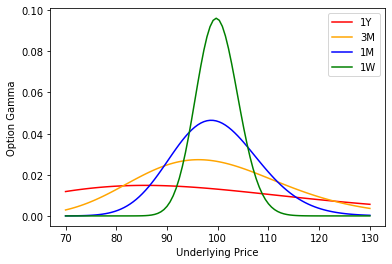

In [13]:
plt.plot(S_space, [gamma(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [gamma(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [gamma(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [gamma(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Option Gamma')

**Properties of Gamma**

- Definition
    - An option's gamma is defined as the change in delta for a one unit change in the underlying price. Note that the unit change in the underlying price may be defined differently depending on the option pricing model being used (Sometimes 1, and sometimes 0.01). Need to be careful on the definition.
    - The gamma of a long option position (both calls and puts) is always positive. This means that delta increases was the underlying price increases and delta falls as the underlying price falls.
    
- Moneyness
    - ATM options have largest gamma. The further an option goes ITM or OTM, the smaller is gamma.
    - (Think of a soccer game again.)

- Time to Expiration
    - The gamma of an ATM option increases as time passes.
    - The gamma of ITM and OTM options will converge to zero at expiration.

- Volatility
    - An increase in volatility will lower the gamma of ATM options and raise the gamma of deep ITM and OTM options.
    - A doubling of vol has roughly the same effect on an option's gamma as a quadrupling of time.

## Vega

**Vega** measures how the option price changes for a unit change in implied volatility.

It is the first order derivative of the option price with respect to its volatility.

$$\nu = \dfrac{\partial V}{\partial \sigma}$$

$$\text{Vega PnL} = \nu \times d\sigma$$ 

$$\nu = Se^{-q\tau}\text{N}'(d_1)\sqrt{\tau} = \Gamma \times S^2\sigma\tau$$

*Note*: Vega is NOT a greek letter. Sometimes we use 'nu' to represent vega as it resembles a 'v'.

In [14]:
def vega(S, T, K, r, vol):
    return S*st.norm.pdf(d1(S, T, K, r, vol))*np.sqrt(T)

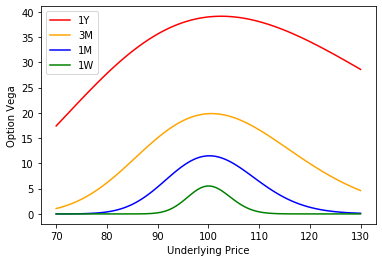

In [15]:
plt.plot(S_space, [vega(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [vega(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [vega(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [vega(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Option Vega')

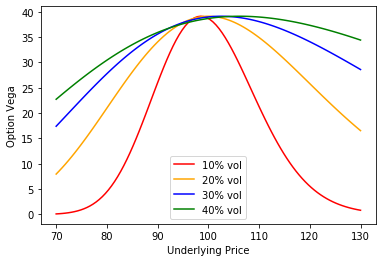

In [16]:
plt.plot(S_space, [vega(S, T=1, K=100, r=0.02, vol=0.1) for S in S_space], color='red', label='10% vol')
plt.plot(S_space, [vega(S, T=1, K=100, r=0.02, vol=0.2) for S in S_space], color='orange', label='20% vol')
plt.plot(S_space, [vega(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='30% vol')
plt.plot(S_space, [vega(S, T=1, K=100, r=0.02, vol=0.4) for S in S_space], color='green', label='40% vol')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Option Vega')

**Properties of Vega**

- Definition
    - Vega is the change in the value of an option for a unit change in implied volatility. (Usually people like to use 1\% as unit change, so you need to be careful of the convention when you use vega provided.)
    
- Moneyness
    - ATM options have the greatest vega. The further an option goes ITM or OTM, the smaller the vega.
 
- Time to expiration
    - Time amplifies the effect of volatility changes. As a result, vega is greater for long-dated options than for short dated options.

- Volatility
    - An increase in volatility increases vega for ITM or OTM options.
    - A change in volatility has no effect on vega of ATM options. This means that ATM option prices increase linearly with changes of volatility. (Why? Think intuitively from the binomial tree model.)

**Relationship between Gamma and Vega**

- Think of an insurance business

## Theta

**Theta** measures how the option price changes for a unit change in time.

It is the first order derivative of option price with respect to the passage of time. For this reason, theta is also sometimes referred to as 'Time Decay'.

$$\Theta = -\dfrac{\partial V}{\partial T}$$

$$\text{Theta PnL} = \Theta \times dt$$

$$\Theta_C = -e^{-q\tau}\dfrac{S\text{N}'(d_1)\sigma}{2\sqrt{\tau}} - rKe^{-r\tau}\text{N}(d_2) + qSe^{-q\tau}\text{N}(d_1)  $$ 

$$\Theta_P = -e^{-q\tau}\dfrac{S\text{N}'(d_1)\sigma}{2\sqrt{\tau}} + rKe^{-r\tau}\text{N}(-d_2) - qSe^{-q\tau}\text{N}(-d_1)  $$ 

In [17]:
def call_theta(S, T, K, r, vol):
    return -S*st.norm.pdf(d1(S, T, K, r, vol))*vol/2/np.sqrt(T) - r*K*np.exp(-r*T)*st.norm.cdf(d2(S,T,K,r,vol))
    
def put_theta(S, T, K, r, vol):
    return -S*st.norm.pdf(d1(S, T, K, r, vol))*vol/2/np.sqrt(T) + r*K*np.exp(-r*T)*st.norm.cdf(-d2(S,T,K,r,vol))

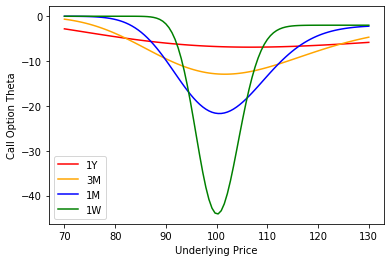

In [18]:
plt.plot(S_space, [call_theta(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [call_theta(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [call_theta(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [call_theta(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Call Option Theta')

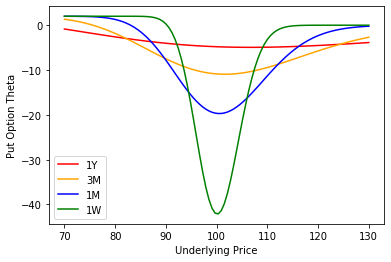

In [19]:
plt.plot(S_space, [put_theta(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [put_theta(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [put_theta(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [put_theta(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Put Option Theta')

In [20]:
T_space = np.linspace(365, 0, 366)

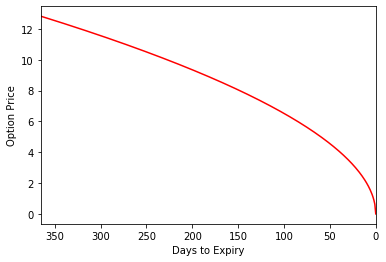

In [21]:
fig, axis = plt.subplots()
axis.plot(T_space, [call_price(S=100, T=t/365, K=100, r=0.02, vol=0.3) for t in T_space], color='red')
axis.set_xlim(365, 0)
axis.set_xlabel('Days to Expiry')
_ = axis.set_ylabel('Option Price')

**Properties of Theta**

- Intrinsic Value
    - An option's intrinsic value or exercise value is the amount by which the option is ITM. ATM and OTM optinos have no intrinsic value. The intrinsic value for ITM options is simply the difference between the underlying price and the option's strike price.

- Time Value
    - The time value of an option is simply the difference between the price of an option and the intrinsic value of the option. For example, with futures=102, a 100 strike call with a price of 2.43 has an intrinsic value of 2 points, and time value equal to 0.43.
    
- Moneyness
    - ATM options have the greatest time value and the greatest rate of time decay. The further an option goes ITM or OTM, the smaller the theta.
    
- Time to expiration
    - Theta increases (in absolute value) as time passes for ATM options.
    
- Volatility
    - The time value of an option increases as volatility increases and so too does theta.

## Rho

**Rho** measures how the option price changes for a unit change in interest rate.

It is the first order derivative of option price with respect to the interest rate.

$$\rho = \dfrac{\partial V}{\partial r}$$

$$\text{Rho PnL} = \rho \times dr$$

$$\rho_C = Kre^{-r\tau}\text{N}(d_2) $$
$$\rho_P = -Kre^{-r\tau}\text{N}(-d_2)$$ 

In [22]:
def call_rho(S, T, K, r, vol):
    return K*T*np.exp(-r*T)*st.norm.cdf(d2(S, T, K, r, vol))

def put_rho(S, T, K, r, vol):
    return -K*T*np.exp(-r*T)*st.norm.cdf(-d2(S, T, K, r, vol))

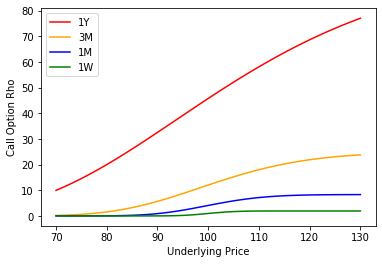

In [23]:
plt.plot(S_space, [call_rho(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [call_rho(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [call_rho(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [call_rho(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Call Option Rho')

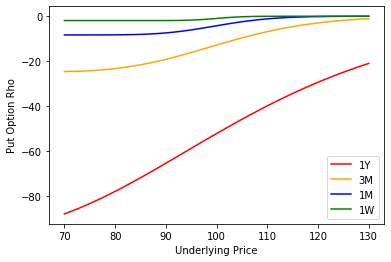

In [24]:
plt.plot(S_space, [put_rho(S, T=1, K=100, r=0.02, vol=0.3) for S in S_space], color='red', label='1Y')
plt.plot(S_space, [put_rho(S, T=1/4, K=100, r=0.02, vol=0.3) for S in S_space], color='orange', label='3M')
plt.plot(S_space, [put_rho(S, T=1/12, K=100, r=0.02, vol=0.3) for S in S_space], color='blue', label='1M')
plt.plot(S_space, [put_rho(S, T=1/52, K=100, r=0.02, vol=0.3) for S in S_space], color='green', label='1W')
plt.legend()
_ = plt.xlabel('Underlying Price')
_ = plt.ylabel('Put Option Rho')